## HDD dataset creation

For the dataset creation we would be using the real world data from BackBlaze 2024 Q1 dataset.
Since the dataset is hugh [10+Gb of raw data], which is unbalanced in nature. 
we would be identifying the highest failing device model for our dataset creation.

In [1]:
# Import the python libraries which are significant and useful for the project

import dask.dataframe as dd
import pandas as pd

In [2]:
# Since the dataset is huge loading on pandas dataframe is not possible will be using python dask module for processing on the dataframe.
# Load the entire dataset into a Dask dataframe

ddf = dd.read_csv("/nobackup/amimalik/bits/dataset/data/*.csv", assume_missing=True)

In [3]:
# Check the columns of the dataset
ddf.dtypes

date                    string[pyarrow]
serial_number           string[pyarrow]
model                   string[pyarrow]
capacity_bytes                  float64
failure                         float64
                             ...       
smart_252_raw                   float64
smart_254_normalized            float64
smart_254_raw                   float64
smart_255_normalized            float64
smart_255_raw                   float64
Length: 186, dtype: object

In [4]:
# Identify the failed device counts by model
failure_counts = ddf.groupby("model")["failure"].sum().compute()

# Sort by failures in descending order
sorted_failures = failure_counts.sort_values(ascending=False)

In [5]:
# Print the sorted table
sorted_failures

model
ST12000NM0008                         597.0
ST8000NM0055                          490.0
ST4000DM000                           453.0
TOSHIBA MG07ACA14TA                   418.0
HGST HUH721212ALN604                  403.0
                                      ...  
Seagate BarraCuda SSD ZA500CM10002      0.0
MTFDDAV480TCB                           0.0
ST16000NM005G                           0.0
ST6000DM001                             0.0
HGST HUS726040ALE610                    0.0
Name: failure, Length: 82, dtype: float64

In [6]:
sorted_failures.to_csv("/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv")

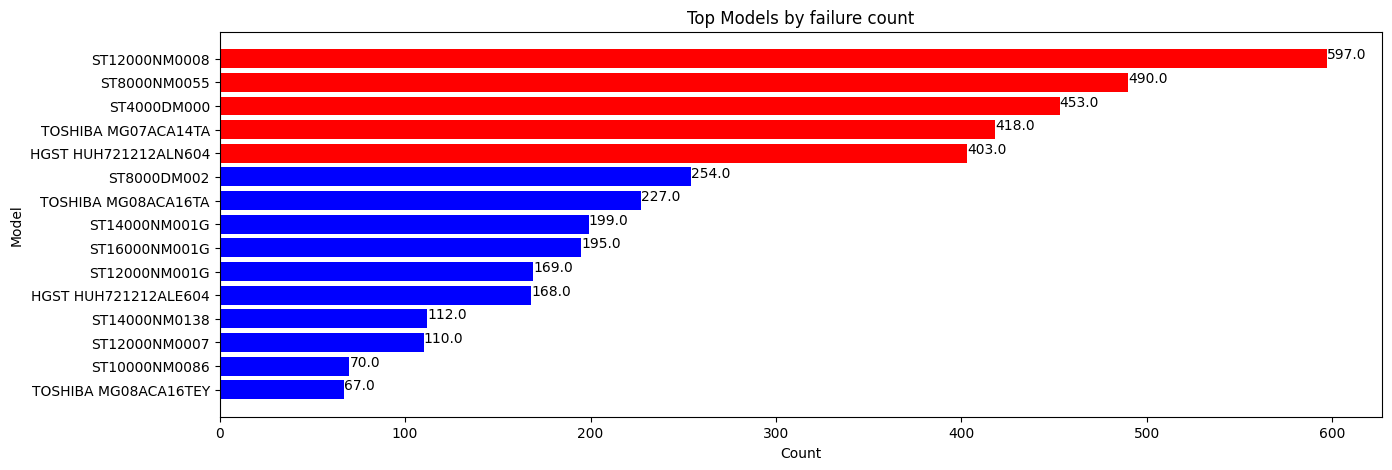

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))

# Get the top 5 models by count
top_5_models = sorted_failures.head(5)
top_15_models = sorted_failures.head(15)

top_15_models.to_csv("/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv")

# Set the color for the top 5 models as red and the rest as blue
colors = ['red' if model in top_5_models else 'blue' for model in top_15_models.index]

# Plot the horizontal bar graph
plt.barh(top_15_models.index, top_15_models.values, color=colors)

# Set the title and labels
plt.title('Top Models by failure count')
plt.xlabel('Count')
plt.ylabel('Model')

plt.gca().invert_yaxis()

for index, value in enumerate(top_15_models.values):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

We will be using the device model "ST12000NM0008" for slecting the failed drive dataset creation

In [8]:
# Filter DataFrame to rows where failure is observed
failed_devices = ddf[ddf["failure"] == 1]

In [ ]:
# Extract models matching to ST12000NM0008 in failed_devices

ST12000NM0008_failed_models = failed_devices[failed_devices["model"] == "ST12000NM0008"]

In [ ]:
# Extract serial numbers for device model ST12000NM0008 which have failed
failed_serials = ST12000NM0008_failed_models["serial_number"]  # Replace "serial_number" with your actual column name
failed_serials = failed_serials.unique().compute()
print (failed_serials)

In [ ]:
# generate the raw dataframe for the failed devices

failed_devices_df = ddf[ddf["serial_number"].isin(failed_serials)]
failed_devices_df = failed_devices_df.compute()

In [ ]:
failed_devices_df.shape

In [ ]:
failed_devices_df.to_csv("/nobackup/amimalik/bits/dataset/dimensions/4Q/failed_devices_df_ST12000NM0008.csv", index=False)

In [ ]:
failed_devices_df.to_parquet("/nobackup/amimalik/bits/dataset/dimensions/4Q/failed_devices_df_ST12000NM0008.parquet")

generate all failed device dataset

In [ ]:
# Filter DataFrame to rows where failure is observed
failed_devices = ddf[ddf["failure"] == 1]
failed_serials = failed_devices["serial_number"]
failed_serials = failed_serials.unique().compute()

In [ ]:
failed_serials.head()

In [ ]:
failed_devices_df = ddf[ddf["serial_number"].isin(failed_serials)]
failed_devices_df = failed_devices_df.compute()

In [ ]:
failed_devices_df.to_parquet("/nobackup/amimalik/bits/dataset/dimensions/4Q/failed_devices_df_all.parquet")